## Get the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets
boston = datasets.load_boston()
iris_X, iris_y = datasets.load_iris(return_X_y=True)  # features and labels for classification
boston_X, boston_y = datasets.load_boston(return_X_y=True)  # features and labels for regression

import warnings
warnings.simplefilter('ignore')

## Transformations

### Imputing values

Scikit-learn's `SimpleImputer` is a transformer for completing missing values.
One needs to set a placeholder for the missing values. The default is `np.nan`. All its occurrences of will be imputed. 

For this we can instantiate and imputer object, a type of transformer object, fit it to the data, and apply the transformation.

In [36]:
X = pd.DataFrame(np.arange(0, 12, 1).reshape(4, 3))
X.loc[0, 0] = X.loc[1, 1] = X.loc[2, 2]  = np.nan


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')  # instantiate imputer
imp.fit(X)  # fit the imputer on X
X = imp.transform(X)  # impute all missing values in X
print(X)


[[ 6.  1.  2.]
 [ 3.  6.  5.]
 [ 6.  7.  6.]
 [ 9. 10. 11.]]


### Scaling values

In [62]:
from sklearn.preprocessing import scale
X_scaled = scale(iris_X)  # default standardization

## Pipelines

The machine learning process can be organized in pipelines. A `pipeline` is an object that combines transformations and a final estimation. In a pipeline each step before the last must be a **transformer**. The last step must be an **estimator**. Both transformers and estimators can learn from the data. <u>The relevant model for machine learning is typically a whole pipeline, rather than a single estimator</u>.

Scikit-learn provides a pipeline constructor to piece together these steps and simplify the workflow code.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')  # initiate imputer for step 1
logreg = LogisticRegression()  # initiate logistic regression for step 2
steps = [('imputation', imp), ('logistic_regression', logreg)]  # list of name/estimator two-tuples
pipeline = Pipeline(steps)  # initiate pipeline

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)  # fit pipeline, not estimator, to the training set
y_pred = pipeline.predict(X_test)  # use pipeline, not estimator, for prediction

balanced_accuracy_score(y_pred, y_test)

1.0

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = [
   ('scaler', StandardScaler()),
   ('knn', KNeighborsClassifier())
]


## Tryouts

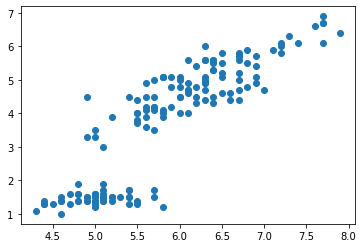

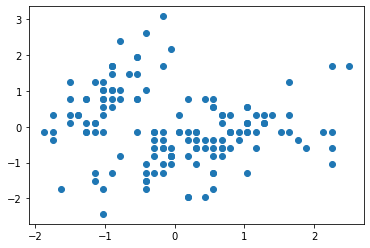

In [17]:
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler().fit_transform(iris_X)  # transformation method
ax = plt.scatter(iris_X[:, 0], iris_X[:, 2])
plt.show()
plt.scatter(scaled_X[:, 0], scaled_X[:, 1])
plt.show()

In [7]:
print(datasets.load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========